## Importamos las librerías 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## Graficos 

### Figura 1

<img src="../images/figura_1.png">

#### Reshape 

In [2]:
figura_1 = pd.read_csv('../data/data_figura_1.csv')
figura_1.shape

(5, 5)

In [3]:
figura_1 = figura_1[['interest', 'before', 'after']]

In [4]:
figura_1 = figura_1.set_index('interest').stack().reset_index()
figura_1.columns = ['interest', 'class', 'avg']
figura_1.head()

,interest,class,avg
0,Bored,before,11
1,Bored,after,12
2,Not great,before,5
3,Not great,after,6
4,OK,before,40


#### Plot

In [10]:
# Paleta de colores
gray_l = '#9c9c9c'
gray_m = '#828282'
blue_l = '#6699CC'
blue_m = '#0067a5'

figura_1.loc[(figura_1['class'] == 'before') & (figura_1['avg'] < 30), 'color'] = gray_l
figura_1.loc[(figura_1['class'] == 'before') & (figura_1['avg'] >= 30), 'color'] = gray_m
figura_1.loc[(figura_1['class'] == 'after') & (figura_1['avg'] < 30), 'color'] = blue_l
figura_1.loc[(figura_1['class'] == 'after') & (figura_1['avg'] >= 30), 'color'] = blue_m

color_1 = figura_1.loc[figura_1['class'] == 'before', 'color'].to_list()
color_2 = figura_1.loc[figura_1['class'] == 'after', 'color'].to_list()

color = color_1 + color_2

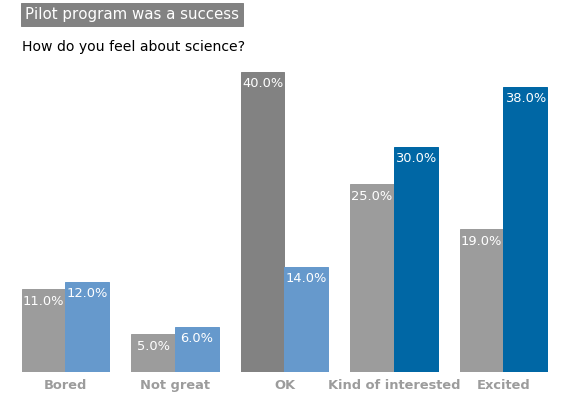

In [35]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 5))
g = sns.barplot(x="interest", y="avg", hue="class", data=figura_1, palette=['#9c9c9c', '#0067a5'], ax=ax)


# Funcion para agregar anotaciones en las barras
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -18),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    size=13, color='white')
        

# Funcion para colores
def mapper_color(rects):
    for i, rec in enumerate(rects):
        rec.set_color(color[i])



# Quitamos las lineas del grafico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Escondemos la layenda y los axis label
ax.legend().set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# Eje x
ax.set_xticklabels(figura_1['interest'].unique(), color='#9c9c9c', size=13, weight='bold', family='sans-serif')
ax.xaxis.set_ticks_position('none') 

# Eje y
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks_position('none') 

# Seteamos el texto dentro de la barra
autolabel(g.patches)

# Seteamos el color segun el valor
mapper_color(g.patches)

fig.tight_layout()

# Titulo
plt.suptitle('Pilot program was a success',fontsize=15, y=1.10, x=0.05, ha='left', 
             color='white', backgroundcolor='#828282')


plt.title('How do you feel about science?', fontsize=14, loc='left', x=0.02)

plt.show()